    1/Import libraries 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


    2/Load Data

In [21]:
import pandas as pd

# Load the CSV file
data = pd.read_excel('cambodia_gdp.xlsx', usecols='A, B')

data = data.iloc[0:49]

# Display the first few rows of data
df = pd.DataFrame(data)
df


,Year,GDP(Million)
0,1975,749.129000
1,1976,790.357000
2,1977,716.261765
3,1978,766.642356
4,1979,723.738503
5,1980,744.384130
6,1981,815.153652
7,1982,865.516040
8,1983,939.291262
9,1984,1020.000000


    3/Initial Insights into Data

In [6]:
data.columns

Index(['Year', 'GDP(Million)'], dtype='object')

In [7]:
print("Dataset Overview:")
print(data.head())

# Dataset info
print("\nDataset Information:")
print(data.info())

 #Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Dataset Overview:
   Year  GDP(Million)
0  1975    749.129000
1  1976    790.357000
2  1977    716.261765
3  1978    766.642356
4  1979    723.738503

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          49 non-null     int64  
 1   GDP(Million)  49 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 916.0 bytes
None

Summary Statistics:
             Year  GDP(Million)
count    49.00000     49.000000
mean   1999.00000   8237.968851
std      14.28869   9225.530572
min    1975.00000    716.261765
25%    1987.00000   1170.000000
50%    1999.00000   3520.000000
75%    2011.00000  12830.000000
max    2023.00000  31770.000000


    4/Visualize Data: scatter plot

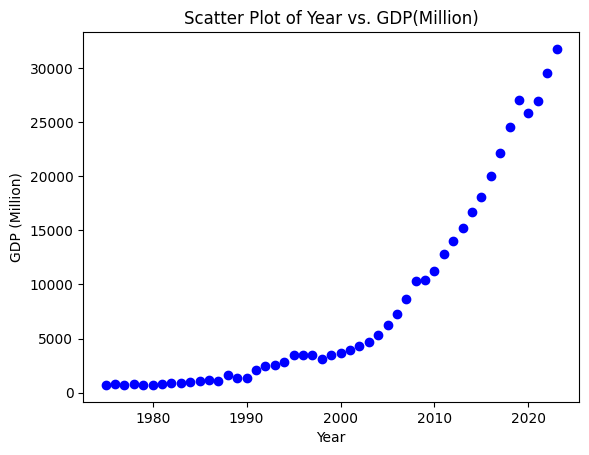

In [8]:
import matplotlib.pyplot as plt

# Use the correct column names
years_column = 'Year'
gdp_column = 'GDP(Million)'

# Create the scatter plot
plt.scatter(data[years_column], data[gdp_column], color='blue')
plt.title('Scatter Plot of Year vs. GDP(Million)')
plt.xlabel('Year')
plt.ylabel('GDP (Million)')
plt.show()


    Histogram: to understand its distribtions

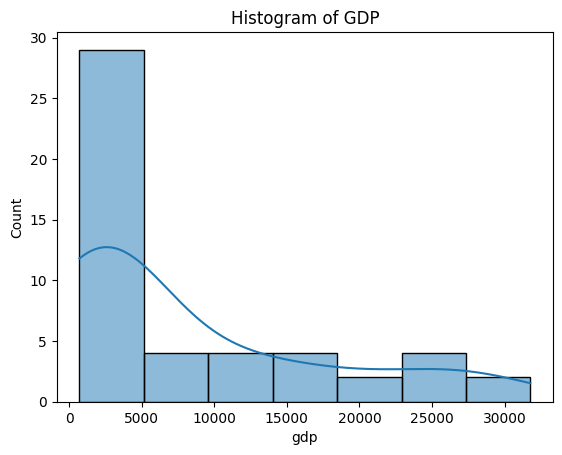

In [13]:
sns.histplot(data=data[gdp_column], kde=True)
plt.title(f'Histogram of GDP')
plt.xlabel('gdp')
plt.show()

    boxplot to understand outlier

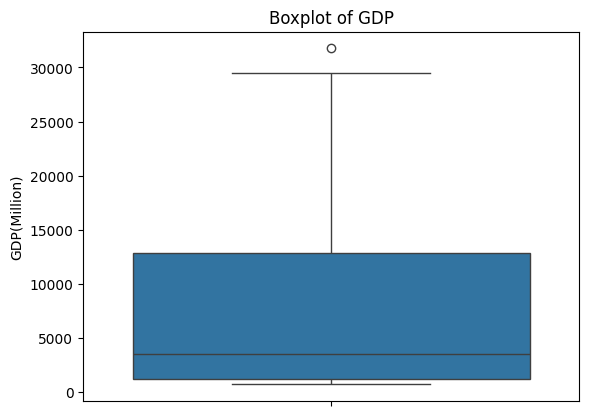

In [14]:
# import pandas as pd
# import matplotlib.pyplot as plt
sns.boxplot(data=data[gdp_column])
plt.title(f'Boxplot of GDP')
plt.show()

    5/ data Preprocessing 

In [125]:
# Independent variable (X) and dependent variable (y)
X = data.iloc[:, :-1].values  #Year
y = data.iloc[:, -1].values  #GDP

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f"Training Set Size: {len(X_train)}")
print(f"Testing Set Size: {len(X_test)}")

Training Set Size: 34
Testing Set Size: 15


In [126]:
y_test

array([ 5340.      ,   723.738503,  3980.      ,  6290.      ,
        8640.      , 14050.      , 10400.      , 18050.      ,
         865.51604 ,  1100.      ,  1170.      ,  7270.      ,
       10350.      ,  4280.      , 31770.      ])

In [69]:
a = pd.DataFrame(X_train)
a
X_train

array([[1977],
       [2021],
       [1993],
       [1990],
       [2003],
       [1997],
       [1991],
       [2016],
       [1995],
       [2017],
       [1983],
       [1988],
       [2000],
       [1980],
       [1992],
       [2010],
       [1989],
       [2013],
       [1976],
       [1987],
       [2018],
       [1999],
       [1981],
       [1998],
       [2011],
       [1996],
       [1994],
       [1984],
       [2014],
       [2020],
       [1978],
       [1975],
       [2022],
       [2019]])

In [135]:
b = pd.DataFrame(y_train)
b
y_train
y_test

[5340.0,
 723.738503,
 3980.0,
 6290.0,
 8640.0,
 14050.0,
 10400.0,
 18050.0,
 865.51604,
 1100.0,
 1170.0,
 7270.0,
 10350.0,
 4280.0,
 31770.0]

In [127]:
X_test

array([[2004],
       [1979],
       [2001],
       [2005],
       [2007],
       [2012],
       [2009],
       [2015],
       [1982],
       [1985],
       [1986],
       [2006],
       [2008],
       [2002],
       [2023]])

    6/Find Model training 

In [141]:
import numpy as np
from scipy.optimize import curve_fit

# Training data (year and GDP)
X_train_values = np.array([
    1977, 2021, 1993, 1990, 2003, 1997, 1991, 2016, 1995, 2017,
    1983, 1988, 2000, 1980, 1992, 2010, 1989, 2013, 1976, 1987,
    2018, 1999, 1981, 1998, 2011, 1996, 1994, 1984, 2014, 2020,
    1978, 1975, 2022, 2019
])
y_train_values = np.array([
    716.261765, 26960., 2530., 1400., 4660., 3440., 2050.,
    20020., 3440., 22180., 939.291262, 1660., 3650., 
    744.38413, 2490., 11240., 1350., 15230., 
    790.357, 1040., 24570., 3520., 
    815.153652, 3120., 12830., 3510., 
    2790., 1020., 16700., 25870.,
    766.642356, 749.129, 
    29500., 27090.
])

# Define the exponential function
def exponential_function(x, a, b):
    return a * np.exp(b * (x - 1975)) # Adjusting x for better fitting

# Initial guesses for parameters
initial_a = y_train_values.min()   # A reasonable guess for a
initial_b = 0                    # A small positive number for b

# Fit the curve
params, covariance = curve_fit(exponential_function, X_train_values, y_train_values, p0=[initial_a, initial_b])

# Extract the parameters
a, b = params
print(f"Fitted parameters: a = {a}, b = {b}")



Fitted parameters: a = 585.1835947288135, b = 0.08488766814997321


    7/Visaulize result-Training Set 

Year: 1975,Predicted GDP: 585.1835947288135
Year: 1976,Predicted GDP: 637.0278042021134
Year: 1977,Predicted GDP: 693.4651397987744
Year: 1978,Predicted GDP: 754.9025284986744
Year: 1979,Predicted GDP: 821.7829488863069
Year: 1980,Predicted GDP: 894.588625134616
Year: 1981,Predicted GDP: 973.8445039591129
Year: 1982,Predicted GDP: 1060.1220396119627
Year: 1983,Predicted GDP: 1154.0433142067754
Year: 1984,Predicted GDP: 1256.2855230826478
Year: 1985,Predicted GDP: 1367.5858575480288
Year: 1986,Predicted GDP: 1488.746820210182
Year: 1987,Predicted GDP: 1620.6420112150731
Year: 1988,Predicted GDP: 1764.2224271178827
Year: 1989,Predicted GDP: 1920.5233178005406
Year: 1990,Predicted GDP: 2090.671650876333
Year: 1991,Predicted GDP: 2275.8942374017674
Year: 1992,Predicted GDP: 2477.526577484051
Year: 1993,Predicted GDP: 2697.0224895631904
Year: 1994,Predicted GDP: 2935.9645927981805
Year: 1995,Predicted GDP: 3196.075718137843
Year: 1996,Predicted GDP: 3479.2313303529345
Year: 1997,Predicted G

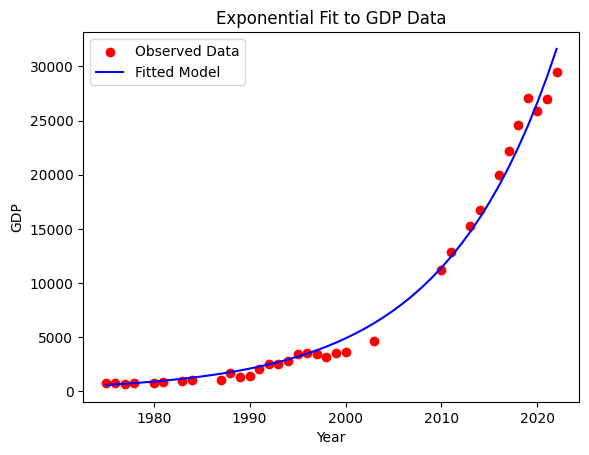

In [142]:
# Create a range of years for prediction
years = np.arange(1975, 2023) # From the start year to the end year

# Calculate model values using the fitted parameters
model_values = exponential_function(years, a, b)

# Print all model values
for year, value in zip(years, model_values):
    print(f"Year: {year},Predicted GDP: {value}")

# Optional: Plot the original data and the fitted model
plt.scatter(X_train_values, y_train_values, label='Observed Data', color='red')
plt.plot(years, model_values, label='Fitted Model', color='blue')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Exponential Fit to GDP Data')
plt.legend()
plt.show()

    8/Prediction on Teasted Data

In [155]:
def exponential_function(x, a, b):
    return a * np.exp(b * (x - 1975))

# Assuming you have your data
X_train = np.array([1977, 2021, 1993, 1990, 2003, 1997, 1991, 2016, 1995, 2017,
    1983, 1988, 2000, 1980, 1992, 2010, 1989, 2013, 1976, 1987,
    2018, 1999, 1981, 1998, 2011, 1996, 1994, 1984, 2014, 2020,
    1978, 1975, 2022, 2019])
X_test = np.array([2004, 1979, 2001, 2005, 2007, 
                   2012, 2009, 2015, 1982, 
                   1985, 1986, 2006, 
                   2008, 2002, 2023])
y_test = np.array([5340.0,
 723.738503,
 3980.0,
 6290.0,
 8640.0,
 14050.0,
 10400.0,
 18050.0,
 865.51604,
 1100.0,
 1170.0,
 7270.0,
 10350.0,
 4280.0,
 31770.0])
a, b = params

# Predict values
y_pred = exponential_function(X_test, a, b)

# Ensure y_pred is the same shape as y_test
if y_pred.shape != y_test.shape:
    y_pred = y_pred.reshape(y_test.shape)

# Compare actual vs. predicted
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

print("\nComparison of Actual vs Predicted Salaries:")
print(comparison)



Comparison of Actual vs Predicted Salaries:
          Actual     Predicted
0    5340.000000   6861.408439
1     723.738503    821.782949
2    3980.000000   5318.810712
3    6290.000000   7469.293383
4    8640.000000   8851.400871
5   14050.000000  13531.415793
6   10400.000000  10489.251574
7   18050.000000  17455.889208
8     865.516040   1060.122040
9    1100.000000   1367.585858
10   1170.000000   1488.746820
11   7270.000000   8131.033757
12  10350.000000   9635.588748
13   4280.000000   5790.029556
14  31770.000000  34424.841051


    9/Visaulize Data-Test set

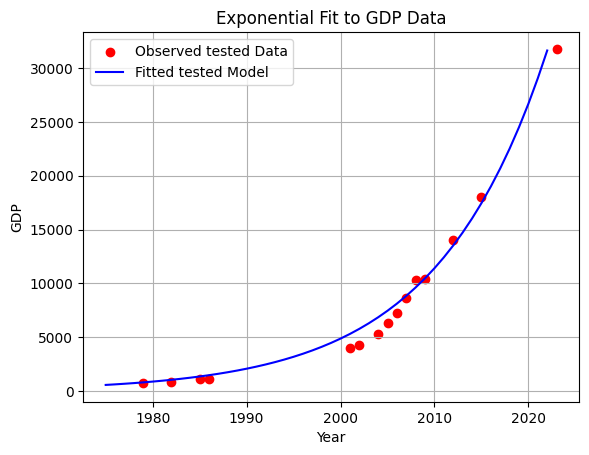

In [153]:
# Create a range of years for prediction
years = np.arange(1975, 2023) # From the start year to the end year

# Calculate model values using the fitted parameters
model_tested = exponential_function(years, a, b)
plt.scatter(X_test, y_test, label='Observed tested Data', color='red')
plt.plot(years, model_tested, label='Fitted tested Model', color='blue')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Exponential Fit to GDP Data')
plt.legend()
plt.grid()
plt.show()

    10/Model Fitting

In [154]:
# compute mean square error
mse = mean_squared_error(y_test,y_pred)
print(f'mean_absolute_error: {mse:.2f}')
# compute mean asolute error
mae = mean_absolute_error(y_test,y_pred)
print(f'mean_absolute_error: {mae:.2f}')
## Compute R² Score
r_2 = r2_score(y_test,y_pred)
print(f'R² Score:{r_2}')

mean_absolute_error: 1131546.85
mean_absolute_error: 804.81
R² Score:0.9821658414529426
